## MN - Clasificadores Probabilisticos

### Naive Bayes

Buena explicación en: https://www.youtube.com/watch?v=De2gX2rWGbs&t=1095s

https://scikit-learn.org/stable/modules/naive_bayes.html

Es un clasificador probabilistico que se basa en el teorema de Bayes (ver documentación arriba), con **Naive** se refiere a una simplificación que permite reducir calculos, en resumen supone que las variables son independientes entre sí.

- Ventajas: Simple de implementar, rapido de entrenar (por la simplificación) y logra en general buenos resultados.

- Problemas: Asume la independencia de variables, la sensibilidad se puede afectar si hay una clase muy mayoritaria, requiere un dataset de buen tamaño.

Existe variantes de acuerdo al tipo de función que utiliza, ellas son:

- GaussianNB: Utiliza distribución normal (Gauss)
- MultinomialNB: Extensión de la regresión logistica, para más clases, bueno para NLP.
- ComplementNB: Modifica el clasificador multinomial anterior, especialmente para dataset no balanceado.
- BernoulliNB: Sólo para decisiones binarias, mirar función en https://es.wikipedia.org/wiki/Distribuci%C3%B3n_Bernoulli
- CategoricalNB: Especial para variables categoricas (no continuas, discretas)

Revisemos los ejemplos de la clase anterior y añadamos NB.

### Ejemplo 1: Predictor diabetes

El modelo de regresión logistica nos dio como resultados:

<pre>
Confusion Matrix
array([[95,  7],
       [21, 31]], dtype=int64)

Classification Report
                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154

AUC score = 0.880656108597285</pre>

In [1]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction', 'SkinThickness']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [2]:
# separamos los datos, un 80% para entrenar el modelo, 20% para probarlo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(len(X_train), len(X_test), len(pima))

614 154 768


In [3]:
from sklearn.naive_bayes import GaussianNB

# Creamos instancia del modelo de regresion logistica
gnb = GaussianNB()

# entrenamos el modelo
gnb.fit(X_train, y_train)

# ejecutamos la prediccion
y_pred = gnb.predict(X_test)

Ahora que tenemos la predicción, lo podemos comparar contra los datos reales de ytest, se puede calcular la matriz de confusión (Confusion Matrix).

In [4]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[92, 10],
       [17, 35]], dtype=int64)

In [5]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.90      0.87       102
   with diabetes       0.78      0.67      0.72        52

        accuracy                           0.82       154
       macro avg       0.81      0.79      0.80       154
    weighted avg       0.82      0.82      0.82       154



In [7]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC score =", auc)

AUC score = 0.8823529411764706


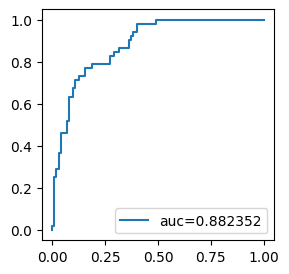

In [10]:
# Veamos la ROC.
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot(fpr,tpr,label="auc="+str(auc)[:8])
plt.legend(loc=4)
plt.show()

Como resultado da un buen clasificador, con resultados similar a la regresión logística. Y el resto de los NB?.

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Creamos instancia del modelo de regresion logistica
mnb = MultinomialNB()

# entrenamos el modelo
mnb.fit(X_train, y_train)

# ejecutamos la prediccion
y_pred = mnb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

[[76 26]
 [25 27]]
                  precision    recall  f1-score   support

without diabetes       0.75      0.75      0.75       102
   with diabetes       0.51      0.52      0.51        52

        accuracy                           0.67       154
       macro avg       0.63      0.63      0.63       154
    weighted avg       0.67      0.67      0.67       154



Da peor, será que con pocas clases no anda bien, Bernoulli deberia dar mejor, probemos.

In [16]:
from sklearn.naive_bayes import BernoulliNB

# Creamos instancia del modelo de regresion logistica
bnb = BernoulliNB()

# entrenamos el modelo
bnb.fit(X_train, y_train)

# ejecutamos la prediccion
y_pred = bnb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

[[100   2]
 [ 50   2]]
                  precision    recall  f1-score   support

without diabetes       0.67      0.98      0.79       102
   with diabetes       0.50      0.04      0.07        52

        accuracy                           0.66       154
       macro avg       0.58      0.51      0.43       154
    weighted avg       0.61      0.66      0.55       154



Tampoco da mejor, revisemos otro ejemplo. Gauss se adapta bien al ejemplo anterior.

### Ejemplo 2. Hotel Reservations

Este conjunto de datos contiene si la reserva fue o no cancelada (is_canceled). La idea es predecir o calcular la probabilidad que la reserva sea eliminada.

In [17]:
import pandas as pd

book = pd.read_csv('hotel_bookings.csv')

# eliminamos datos no relevantes
columns_to_drop = ['country','agent','company','reservation_status','reservation_status_date']
book.drop(columns_to_drop, axis = 1, inplace = True)

# rellenamos nan
book.fillna(book.mode().iloc[0], inplace=True)

# columnas categoricas
cat_cols = [col for col in book.columns if book[col].dtype == 'O']

# convertimos cada columna categorica en dummy
dummy_df = pd.get_dummies(book, columns=cat_cols)

In [18]:
# seleccionamos las variables relevantes para el modelo, por ejemplo meal_undefined no tiene sentido
X = dummy_df[['lead_time',
              'stays_in_week_nights',
              'adults',
              'children',
              'previous_cancellations',
              'previous_bookings_not_canceled',
              'booking_changes',
              'adr',
              'required_car_parking_spaces',
              'total_of_special_requests',
              'hotel_City Hotel',
              'arrival_date_month_August','arrival_date_month_December','arrival_date_month_February','arrival_date_month_January',
              'arrival_date_month_July','arrival_date_month_June','arrival_date_month_March','arrival_date_month_May',
              'arrival_date_month_November','arrival_date_month_October','arrival_date_month_September',
              'meal_BB','meal_FB','meal_HB','meal_SC',
              'market_segment_Corporate','market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
              'reserved_room_type_B','reserved_room_type_C','reserved_room_type_D','reserved_room_type_E','reserved_room_type_F',
              'reserved_room_type_G','reserved_room_type_H',
              'deposit_type_Non Refund','deposit_type_Refundable',
              'customer_type_Group','customer_type_Transient','customer_type_Transient-Party']]

# select target/dependent variable
y = dummy_df['is_canceled']

In [37]:
# nuevamente separamos 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
# fit the model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Dato anterior:
<pre>
Exactitud de la regresion logistica = 0.8102856185610186
Confusion Matrix : 
 [[13973   934]
 [ 3596  5375]]

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# vemos como funciona
y_pred_lr = gnb.predict(X_test)

# generate evaluation metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)

print("Exactitud de la regresion logistica =", acc_lr)
print("Confusion Matrix : \n", conf)

Exactitud de la regresion logistica = 0.6011391238797219
Confusion Matrix : 
 [[6733 8174]
 [1350 7621]]


Ahora Gauss, no anda bien, sera por la variables categoricas?. Probemos:

In [41]:
bnb =BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [44]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# vemos como funciona
y_pred_lr = bnb.predict(X_test)

# generate evaluation metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)

print("Exactitud de la regresion logistica =", acc_lr)
print("Confusion Matrix : \n", conf)

Exactitud de la regresion logistica = 0.7732222129156546
Confusion Matrix : 
 [[13502  1405]
 [ 4010  4961]]


In [45]:
from sklearn.metrics import classification_report
target_names = ['no cancelado', 'cancelado']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

no cancelado       0.77      0.91      0.83     14907
   cancelado       0.78      0.55      0.65      8971

    accuracy                           0.77     23878
   macro avg       0.78      0.73      0.74     23878
weighted avg       0.77      0.77      0.76     23878



Al usar variables categoricas, hay un problema con negativos en la muestra, se deberia quitar, sin embargo hay una forma (no se si tan buena de arreglarlo). Por eso va el preprocesamiento, puede buscar la variable y eliminarla.

In [46]:
# fit the model on the training data
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# vemos como funciona
y_pred_lr = cnb.predict(X_test)

# generate evaluation metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)

print("Exactitud de la regresion logistica =", acc_lr)
print("Confusion Matrix : \n", conf)

Exactitud de la regresion logistica = 0.7496859033419885
Confusion Matrix : 
 [[14828    79]
 [ 5898  3073]]


In [48]:
from sklearn.metrics import classification_report
target_names = ['no cancelado', 'cancelado']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

no cancelado       0.72      0.99      0.83     14907
   cancelado       0.97      0.34      0.51      8971

    accuracy                           0.75     23878
   macro avg       0.85      0.67      0.67     23878
weighted avg       0.81      0.75      0.71     23878



### Ejemplo 3. NLP Disaster Tweets

En este conjunto de datos, target 1 representa que es un desastre, 0 que no. Vamos a usar text para el procesamiento de lenguaje natural (NLP).

In [49]:
import pandas as pd

tweets= pd.read_csv('train.csv')

In [50]:
import re, string

#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [51]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
    
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [53]:
# procesamiento final
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

tweets['clean_text'] = tweets['text'].apply(lambda x: finalpreprocess(x))
tweets.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...


In [54]:
# separamos los datos, un 80% para entrenar el modelo, 20% para probarlo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_val, y_train, y_val = train_test_split(tweets["clean_text"],
                                                  tweets["target"],
                                                  test_size=0.2,
                                                  shuffle=True)

# TF-IDF (Term Frequency-Inverse Document Frequency)
# TF calcula la frecuencia de cada palabra
# IDF mediante un calculo estadistico mide la importancia o no del termino en el contexto
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

# Vectorizamos los datos, esto signica que representamos los terminos por numeros,
# de modo que podemos ingresar numeros al modelo
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

Resultados anteriores:
<pre>
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       892
           1       0.72      0.76      0.74       631

    accuracy                           0.78      1523
   macro avg       0.77      0.78      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Confusion Matrix: [[706 186]
 [151 480]]
AUC: 0.8605059589376958

In [61]:
# Creamos modelo multinomial, pues es bueno para clasificacion de palabras
from sklearn.naive_bayes import MultinomialNB
mnb_tfidf=MultinomialNB()
mnb_tfidf.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = mnb_tfidf.predict(X_val_vectors_tfidf)
y_prob = mnb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       837
           1       0.88      0.65      0.75       686

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.82      0.80      0.80      1523

Confusion Matrix: [[774  63]
 [238 448]]
AUC: 0.8636869494341516


In [62]:
# podemos probar ahora nosotros

mi_test = {"text": ["it was a disaster", "An earthquake at Chile", "Something wonderful happens", "there are a wildfire in LA"]}
mi_df = pd.DataFrame.from_dict(mi_test)
mi_df['clean_text'] = mi_df['text'].apply(lambda x: finalpreprocess(x))
X_test=mi_df['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test)
y_predict = mnb_tfidf.predict(X_vector)
y_prob = mnb_tfidf.predict_proba(X_vector)[:,1]
mi_df['predict_prob']= y_prob
mi_df['target']= y_predict
print(mi_df)

                          text                   clean_text  predict_prob  \
0            it was a disaster                     disaster      0.644692   
1       An earthquake at Chile             earthquake chile      0.561274   
2  Something wonderful happens  something wonderful happens      0.198261   
3   there are a wildfire in LA                  wildfire la      0.889594   

   target  
0       1  
1       1  
2       0  
3       1  


### Ejemplo 4. Recordar base de datos IRIS.

Recordar que tenemos tres categorias: setosa, versicolor, virginica.

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
# separamos muestra, igual que ejemplo anterior
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std

SGDClassifier(loss="hinge", penalty="l2",alpha=0.001, max_iter=50)

Con las dos primeras caracteristicas, nos dio 0.8

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test) 
print('Exactitud GaussianNB:',metrics.accuracy_score(y_pred,y_test))

Exactitud GaussianNB: 0.9


In [72]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler #me paso lo mismo que las reservas de hotel

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test) 
print('Exactitud MultinomialNB:',metrics.accuracy_score(y_pred,y_test))

Exactitud MultinomialNB: 0.6333333333333333


Mejor Gauss, recordar que SGD nos dio 1.0 con todas las caracteristicas. Veamos y comparemos.

In [74]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test) 
print('Exactitud GaussianNB:',metrics.accuracy_score(y_pred,y_test))

Exactitud GaussianNB: 1.0


Funciona muy similar al clasificador SGD (Stochastic Gradient Descent)

### Random Forest

Para terminar, revisemos el clasificador RandomForest que clasifica de acuerdo con los resultados probabilitiscos en un árbol de decisión.

- Ventajas: Muy bueno para clasificar con muchas opciones, requiere no tantos datos para enrenar, es sencillo de implementar.

- Desventajas: Es complejo entender/interpretar los resultados (arbol puede ser muy grande), puede requerir mayor tiempo de entrenamiento (una vez).

In [76]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction', 'SkinThickness']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [77]:
# separamos los datos, un 80% para entrenar el modelo, 20% para probarlo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(len(X_train), len(X_test), len(pima))

614 154 768


In [79]:
from sklearn.ensemble import RandomForestClassifier

# Creamos instancia del modelo de regresion logistica
rfc = RandomForestClassifier()

# entrenamos el modelo
rfc.fit(X_train, y_train)

# ejecutamos la prediccion
y_pred = rfc.predict(X_test)

In [80]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[91, 11],
       [21, 31]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.89      0.85       102
   with diabetes       0.74      0.60      0.66        52

        accuracy                           0.79       154
       macro avg       0.78      0.74      0.76       154
    weighted avg       0.79      0.79      0.79       154



In [83]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC score =", auc)

AUC score = 0.8723604826546003


Note que anda bien de todos modos, aunque el arbol de decisión es bastante sencillo en este caso. Lo agregue solo porque es una buena alternativa, que pueden usar a futuro (cuando tienen pocos datos).

In [84]:
# veamos contra la base de datos iris
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test) 
print('Exactitud Random Forest:',metrics.accuracy_score(y_pred,y_test))

Exactitud Random Forest: 1.0


Probar otros ejemplos, RandomForest lo recomiendo con muchas clases y pocos datos.